In [220]:
import numpy as np
import scipy.io as sio
import scipy.optimize as so
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font', family='Verdana')

# загрузка данных

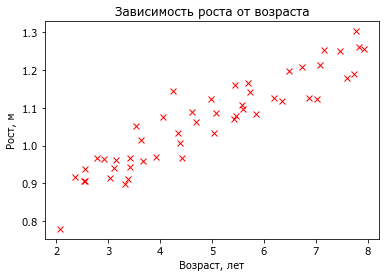

In [221]:
data = sio.loadmat('heights.mat')
Xdata = data['age']
ydata = data['height']

# Xp, Yp задают линию, которая будет отображена на графике поверх данных
def plot_data(X, y, Xp=None, yp=None):
    plt.plot(X, y, 'xr')
    if Xp is not None and yp is not None:
        plt.plot(Xp, yp, '-b')
    plt.xlabel('Возраст, лет')
    plt.ylabel('Рост, м')
    plt.title('Зависимость роста от возраста')
    plt.show()

plot_data(Xdata, ydata)

# h(x,theta)

In [222]:
m, n = Xdata.shape

Xdata1 = np.concatenate([np.ones((m,1)), Xdata], axis=1)
def h(X, theta):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    return X.dot(theta)


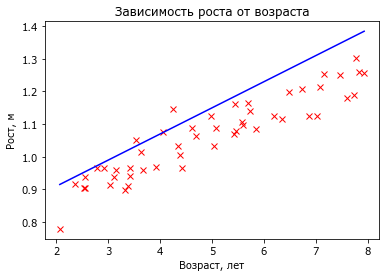

In [223]:
theta = np.array([[0.75], [0.08]])
yp = h(Xdata1, theta) # Предсказанные значения
#print (yp)
plot_data(Xdata, ydata, Xdata, yp)

# Функция потерь

In [224]:
def J(theta, X, y):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert X.shape[0] == y.shape[0], "Разное количество выходных и входных переменных"
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    return 0.0
    ###

# Производная функции потерь

In [225]:
def dJ(theta, X, y):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert X.shape[0] == y.shape[0], "Разное количество выходных и входных переменных"
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    predict = h(X,theta)
    difference = np.array((predict-y),dtype=object)
    return (1/m)*(X.T.dot(difference))
    ###
dJ(theta, Xdata1, ydata)

array([[0.07919970316000002],
       [0.4370855114486984]], dtype=object)

In [226]:
eps = 0.01
# НАЙДИТЕ ОПТИМАЛЬНОЕ ЗНАЧЕНИЕ КОЭФФИЦИЕНТА alpha
alpha = 0.07

# Градиентный спуск

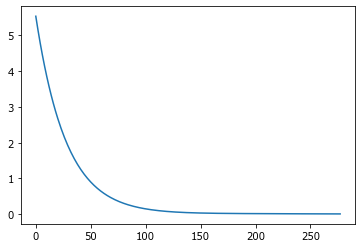

In [227]:
k, Kmax = 0, 100000
norms = []

# Инициализация
theta_grad = np.zeros((n+1, 1))
while True:
    d = dJ(theta_grad, Xdata1, ydata) # Текущее значение градиента
    
    norm = np.linalg.norm(d)
    norms.append(norm)
    k += 1
    if k > Kmax or norm < eps: break
    
    theta_grad =theta_grad - alpha*d
    ##



plt.plot(norms)
plt.show()


[[0.6561043733823988]
 [0.08100243946342087]]


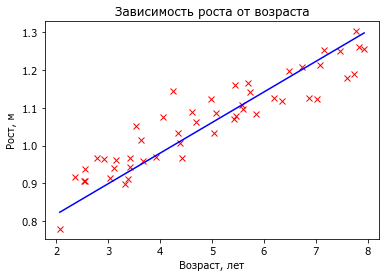

In [228]:
print (theta_grad)
yp = h(Xdata1, theta_grad) # Предсказанные значения
plot_data(Xdata, ydata, Xdata, yp)

# BFGS

In [ ]:
def Jv(th):
    theta = np.array(th)
    theta = np.reshape(theta, (n+1, 1))
    return J(theta, Xdata1, ydata)[0, 0]

# ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
def dJv(th):
    
    pass

result = so.minimize(Jv, [0.0] * (n+1), method='BFGS',jac=dJv)
###

print(result)
theta_bfgs = np.reshape(result.x, (n+1, 1))

In [ ]:
print (theta_bfgs)
yp = h(Xdata1, theta_bfgs) # Предсказанные значения
plot_data(Xdata, ydata, Xdata, yp)

# Вторая задача

In [229]:
data = sio.loadmat('prices.mat')
Xdata = data['house']
ydata = data['price']
